# Анализ рынка строительства

## Загрузка и обработка данных

In [313]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
with tqdm(total=1, desc="Чтение файла") as pbar:
    reestr = pd.read_excel("/Users/artur/Downloads/Реестр.xlsx")
    pbar.update(1)

/opt/anaconda3/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
Чтение файла: 100%|██████████████████████████████| 1/1 [06:46<00:00, 406.21s/it]


In [159]:
reestr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603522 entries, 0 to 603521
Data columns (total 23 columns):
 #   Column                                                                                    Non-Null Count   Dtype 
---  ------                                                                                    --------------   ----- 
 0   Единый реестр субъектов малого и среднего предпринимательства по состоянию на 15.04.2024  603521 non-null  object
 1   Unnamed: 1                                                                                603521 non-null  object
 2   Unnamed: 2                                                                                603521 non-null  object
 3   Unnamed: 3                                                                                603521 non-null  object
 4   Unnamed: 4                                                                                603521 non-null  object
 5   Unnamed: 5                                         

Посмотрим на наши данные

In [160]:
reestr.head()

Единый реестр субъектов малого и среднего предпринимательства по состоянию на 15.04.2024  \
0                                                NaN                                         
1                                              № п/п                                         
2                                                  1                                         
3                                                  2                                         
4                                                  3                                         

                                          Unnamed: 1        Unnamed: 2  \
0                                                NaN               NaN   
1                                 Наименование / ФИО      Тип субъекта   
2  " МЕГАПОЛИС " ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВ...  Юридическое лицо   
3  " СТАЛЬИНВЕСТСТРОЙ " ОБЩЕСТВО С ОГРАНИЧЕННОЙ О...  Юридическое лицо   
4  " СТРОЙТЕХНИКА - М " ОБЩЕСТВО С ОГРАНИЧЕННОЙ О...  Юридическое лицо   

                  Unnamed: 3     Unnamed: 4  Unnamed: 5  \
0                        NaN            NaN         NaN   
1                  Категория           ОГРН         ИНН   
2  Не является субъектом МСП  1027800523376  7801190028   
3  Не является субъектом МСП  1037800033545  7801227976   
4  Не является субъектом МСП  1025204418293  5263039399   

                                   Unnamed: 6                  Unnamed: 7  \
0                                         NaN                         NaN   
1                   Основной вид деятельности                      Регион   
2   41.2 Строительство жилых и нежилых зданий      78 - г.Санкт-Петербург   
3  41.20 Строительство жилых и нежилых зданий      78 - г.Санкт-Петербург   
4  41.20 Строительство жилых и нежилых зданий  52 - Нижегородская область   

  Unnamed: 8         Unnamed: 9  ...                 Unnamed: 13 Unnamed: 14  \
0        NaN                NaN  ...                         NaN         NaN   
1      Район              Город  ...  Дата исключения из реестра     Телефон   
2        NaN                NaN  ...                  10.10.2021         NaN   
3        NaN                NaN  ...                  10.08.2018         NaN   
4        NaN  г Нижний Новгород  ...                  10.07.2022         NaN   

  Unnamed: 15 Unnamed: 16       Unnamed: 17  \
0         NaN         NaN               NaN   
1      E-mail         WWW  Наличие лицензий   
2         NaN         NaN               Нет   
3         NaN         NaN               Нет   
4         NaN         NaN               Нет   

                                 Unnamed: 18  \
0                                        NaN   
1  Наличие заключенных договоров, контрактов   
2                                        Нет   
3                                        Нет   
4                                        Нет   

                                         Unnamed: 19  \
0                                                NaN   
1  Производство инновационной, высокотехнологично...   
2                                                Нет   
3                                                Нет   
4                                                Нет   

                        Unnamed: 20                       Unnamed: 21  \
0                               NaN                               NaN   
1  Участие в программах партнерства  Является социальным предприятием   
2                               Нет                               Нет   
3                               Нет                               Нет   
4                               Нет                               Нет   

                                         Unnamed: 22  
0                                                NaN  
1  Среднесписочная численность работников за пред...  
2                                                NaN  
3                                                NaN  
4                                                NaN  

[5 rows x 23 c

Установим правильные названия колонок

In [214]:
new_columns = reestr.iloc[1]
df = reestr[2:]
df.columns = new_columns

df.head()

1 № п/п                                 Наименование / ФИО      Тип субъекта  \
2     1  " МЕГАПОЛИС " ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВ...  Юридическое лицо   
3     2  " СТАЛЬИНВЕСТСТРОЙ " ОБЩЕСТВО С ОГРАНИЧЕННОЙ О...  Юридическое лицо   
4     3  " СТРОЙТЕХНИКА - М " ОБЩЕСТВО С ОГРАНИЧЕННОЙ О...  Юридическое лицо   
5     4   "БАЗИС" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ  Юридическое лицо   
6     5   "БЕЛАГ" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ  Юридическое лицо   

1                  Категория           ОГРН         ИНН  \
2  Не является субъектом МСП  1027800523376  7801190028   
3  Не является субъектом МСП  1037800033545  7801227976   
4  Не является субъектом МСП  1025204418293  5263039399   
5           Микропредприятие  1025204411682  5263025484   
6  Не является субъектом МСП  1037800039276  7801123215   

1                   Основной вид деятельности                      Регион  \
2   41.2 Строительство жилых и нежилых зданий      78 - г.Санкт-Петербург   
3  41.20 Строительство жилых и нежилых зданий      78 - г.Санкт-Петербург   
4  41.20 Строительство жилых и нежилых зданий  52 - Нижегородская область   
5  41.20 Строительство жилых и нежилых зданий  52 - Нижегородская область   
6  41.20 Строительство жилых и нежилых зданий      78 - г.Санкт-Петербург   

1 Район              Город  ... Дата исключения из реестра Телефон E-mail  \
2   NaN                NaN  ...                 10.10.2021     NaN    NaN   
3   NaN                NaN  ...                 10.08.2018     NaN    NaN   
4   NaN  г Нижний Новгород  ...                 10.07.2022     NaN    NaN   
5   NaN  г Нижний Новгород  ...                        NaN     NaN    NaN   
6   NaN                NaN  ...                 10.07.2021     NaN    NaN   

1  WWW Наличие лицензий Наличие заключенных договоров, контрактов  \
2  NaN              Нет                                       Нет   
3  NaN              Нет                                       Нет   
4  NaN              Нет                                       Нет   
5  NaN              Нет                                       Нет   
6  NaN              Нет                                       Нет   

1 Производство инновационной, высокотехнологичной продукции  \
2                                                Нет          
3                                                Нет          
4                                                Нет          
5                                                Нет          
6                                                Нет          

1 Участие в программах партнерства Является социальным предприятием  \
2                              Нет                              Нет   
3                              Нет                              Нет   
4                              Нет                              Нет   
5                              Нет                              Нет   
6                              Нет                              Нет   

1 Среднесписочная численность работников за предшествующий календарный год  
2                                                NaN                        
3                                                NaN                        
4                                                NaN                        
5                                                  1                        
6                                                NaN                        

[5 rows x 23 columns]

Нас интересуют только юридические лица, средние и малые предприятия в видах деятельности "Строительство жилых и нежилых зданий".

Посмотрим, какие значения может принимать колонка "Основной вид деятельности"

In [215]:
df["Основной вид деятельности"].unique()

array(['41.2 Строительство жилых и нежилых зданий',
       '41.20 Строительство жилых и нежилых зданий',
       '41.10 Разработка строительных проектов',
       '41 Строительство зданий', '41.1 Разработка строительных проектов'],
      dtype=object)

Определимся с тем, будем ли мы рассматривать код 41.2.

По данным с https://okvedkod.ru/okved/kod-41.2

"
Код ОКВЭД 41.2 включает в себя 3 уточняющих кода:

ОКВЭД 41.20	Строительство жилых и нежилых зданий

ОКВЭД 41.20.1	Жилищное строительство

ОКВЭД 41.20.9	Прочие виды строительства жилых и нежилых зданий
"

Поэтому, будем работать только с кодами 41.20

In [216]:
df = df[df["Основной вид деятельности"] =='41.20 Строительство жилых и нежилых зданий']
df["Основной вид деятельности"].unique()

array(['41.20 Строительство жилых и нежилых зданий'], dtype=object)

Проверим ИНН на пропуски

In [217]:
nanvalues = int(df["ИНН"].isna().sum())
print(nanvalues)

0


In [218]:
df["ИНН"].sort_values()

24947     010000008060
401884      0100000170
285834      0100000205
490201      0100000413
394256      0100000565
              ...     
538738    990116478510
37689     990116693268
528545    990199401533
577054    990199493189
571745    990199887338
Name: ИНН, Length: 530132, dtype: object

По виду данных делаем вывод, что пропуски отсутствуют(ИНН представляют собой различные числа, NaN точно отсутствуют, значений, характерных для пропусков(вроде 0, -1, -99 и тд) замечено не было

Также, нас интересуют только юридические лица(малые и средние предприятия), поэтому необходимо еще немного поработать с датасетом

In [219]:
df["Тип субъекта"].unique()

array(['Юридическое лицо', 'Индивидуальный предприниматель'], dtype=object)

Удалим из датасета Индивидуальных предпринимателей

In [220]:
df = df[df["Тип субъекта"] == 'Юридическое лицо']
df["Тип субъекта"].unique()

array(['Юридическое лицо'], dtype=object)

In [221]:
df["Категория"].unique()

array(['Не является субъектом МСП', 'Микропредприятие',
       'Малое предприятие', 'Среднее предприятие'], dtype=object)

Оставим лишь малые и средние предприятия

In [222]:
df = df[(df["Категория"] == 'Малое предприятие') | (df["Категория"] == 'Среднее предприятие')]
df["Категория"].unique()

array(['Малое предприятие', 'Среднее предприятие'], dtype=object)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8927 entries, 21 to 580136
Data columns (total 23 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   № п/п                                                                     8927 non-null   object
 1   Наименование / ФИО                                                        8927 non-null   object
 2   Тип субъекта                                                              8927 non-null   object
 3   Категория                                                                 8927 non-null   object
 4   ОГРН                                                                      8927 non-null   object
 5   ИНН                                                                       8927 non-null   object
 6   Основной вид деятельности                                                 

Несколько колонок можно удалить, однако это не так важно, ведь нас сейчас интересуют лишь ИНН.

Заметим, что из 603521 организаций осталось лишь 8927

In [224]:
copyDf = df.copy()

## Получение данных из ФНС. Анализ

In [171]:
import requests
from bs4 import BeautifulSoup

Все необходимые данные будем получать с сайта https://bo.nalog.gov.ru/

Разобравшись в нем, заметим, что мы можем найти организацию, зная ее ИНН
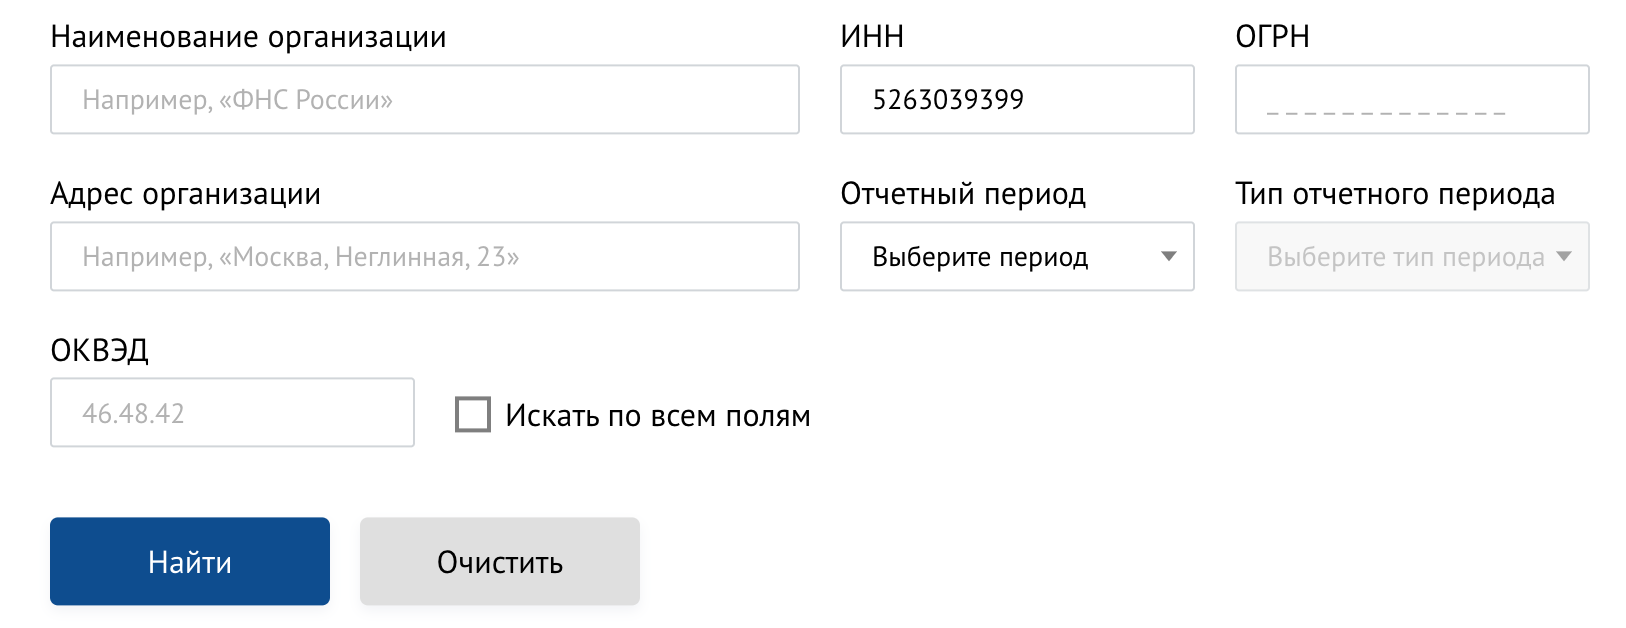

После такого поискового запроса попадаем на следующую страницу
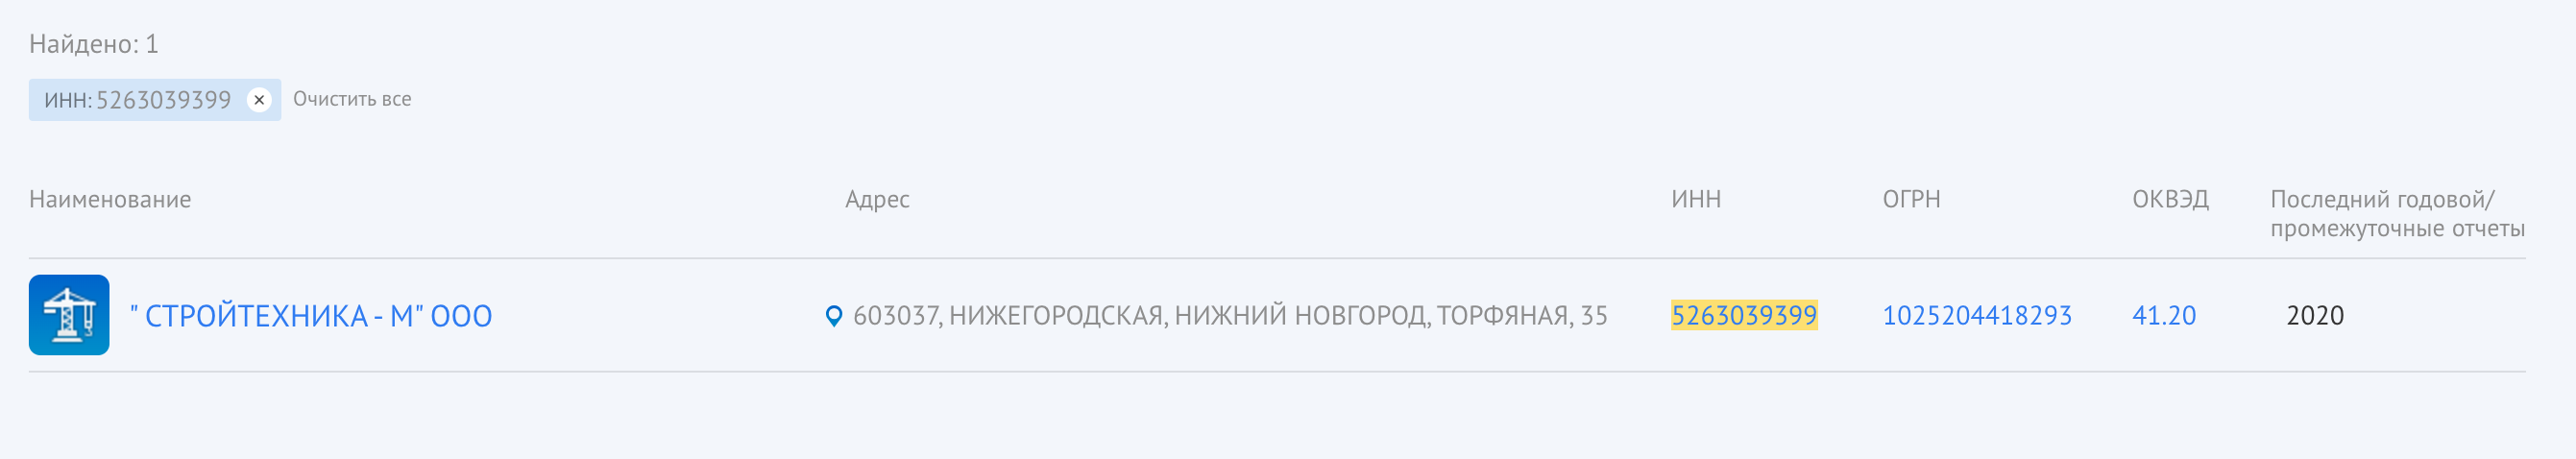

Наконец, нажав на название организации, попадаем на ее карточку, где находятся нужные нам данные для расчетов

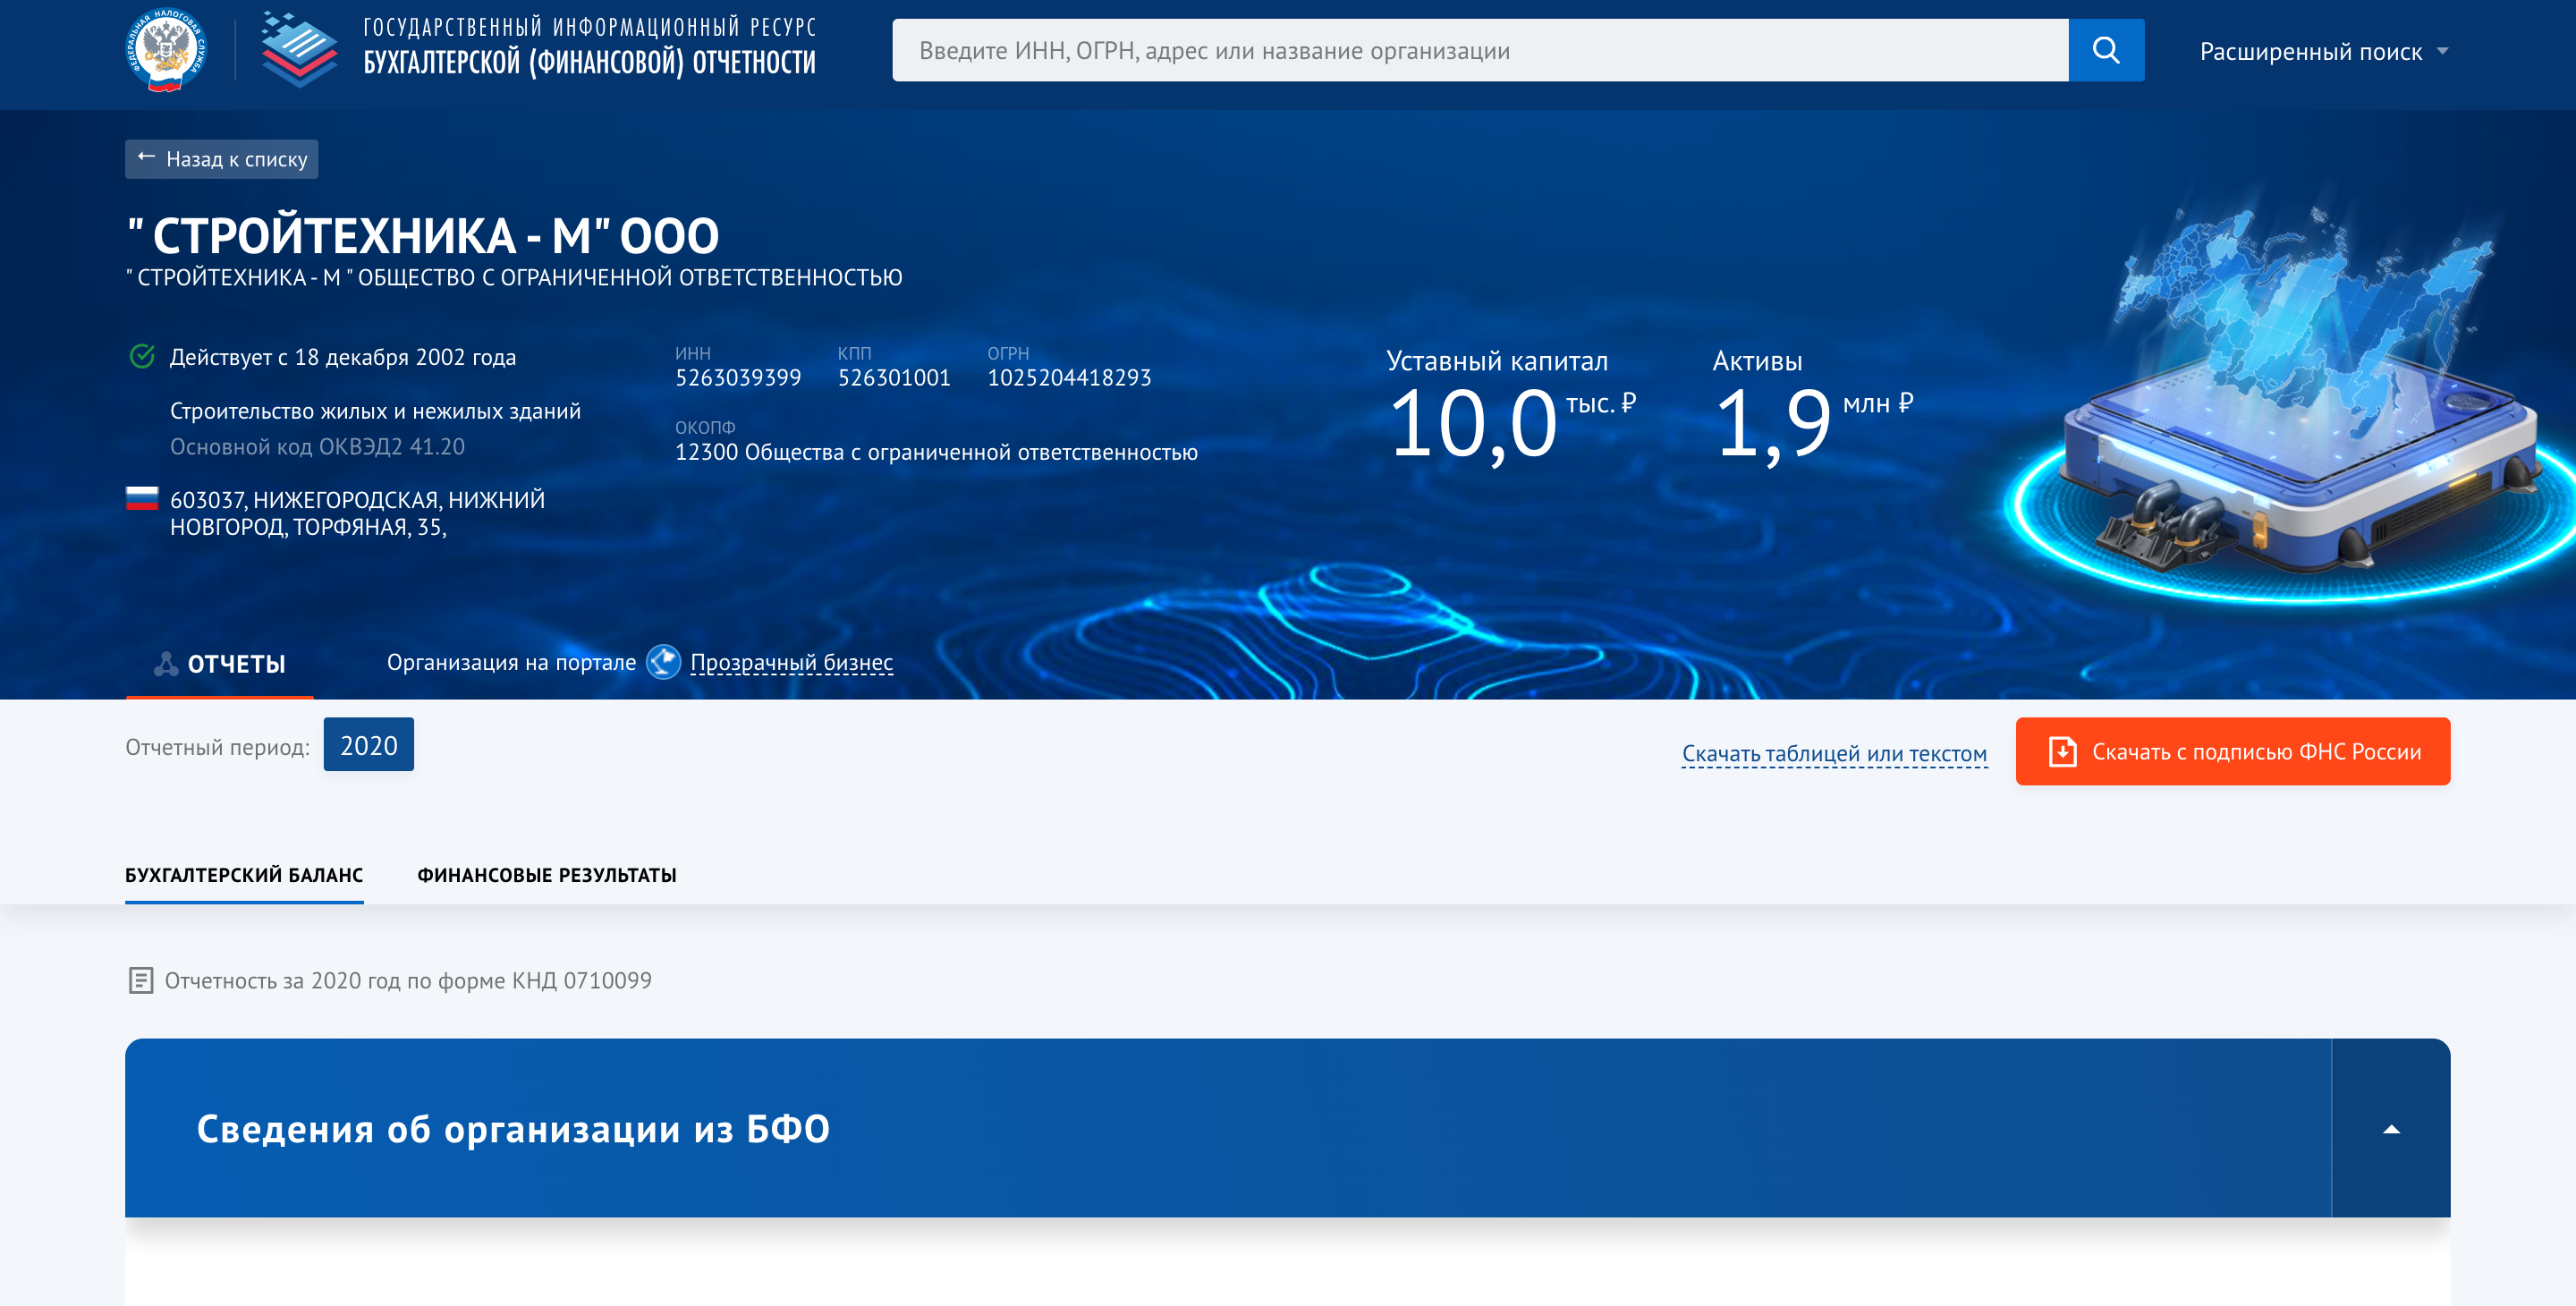

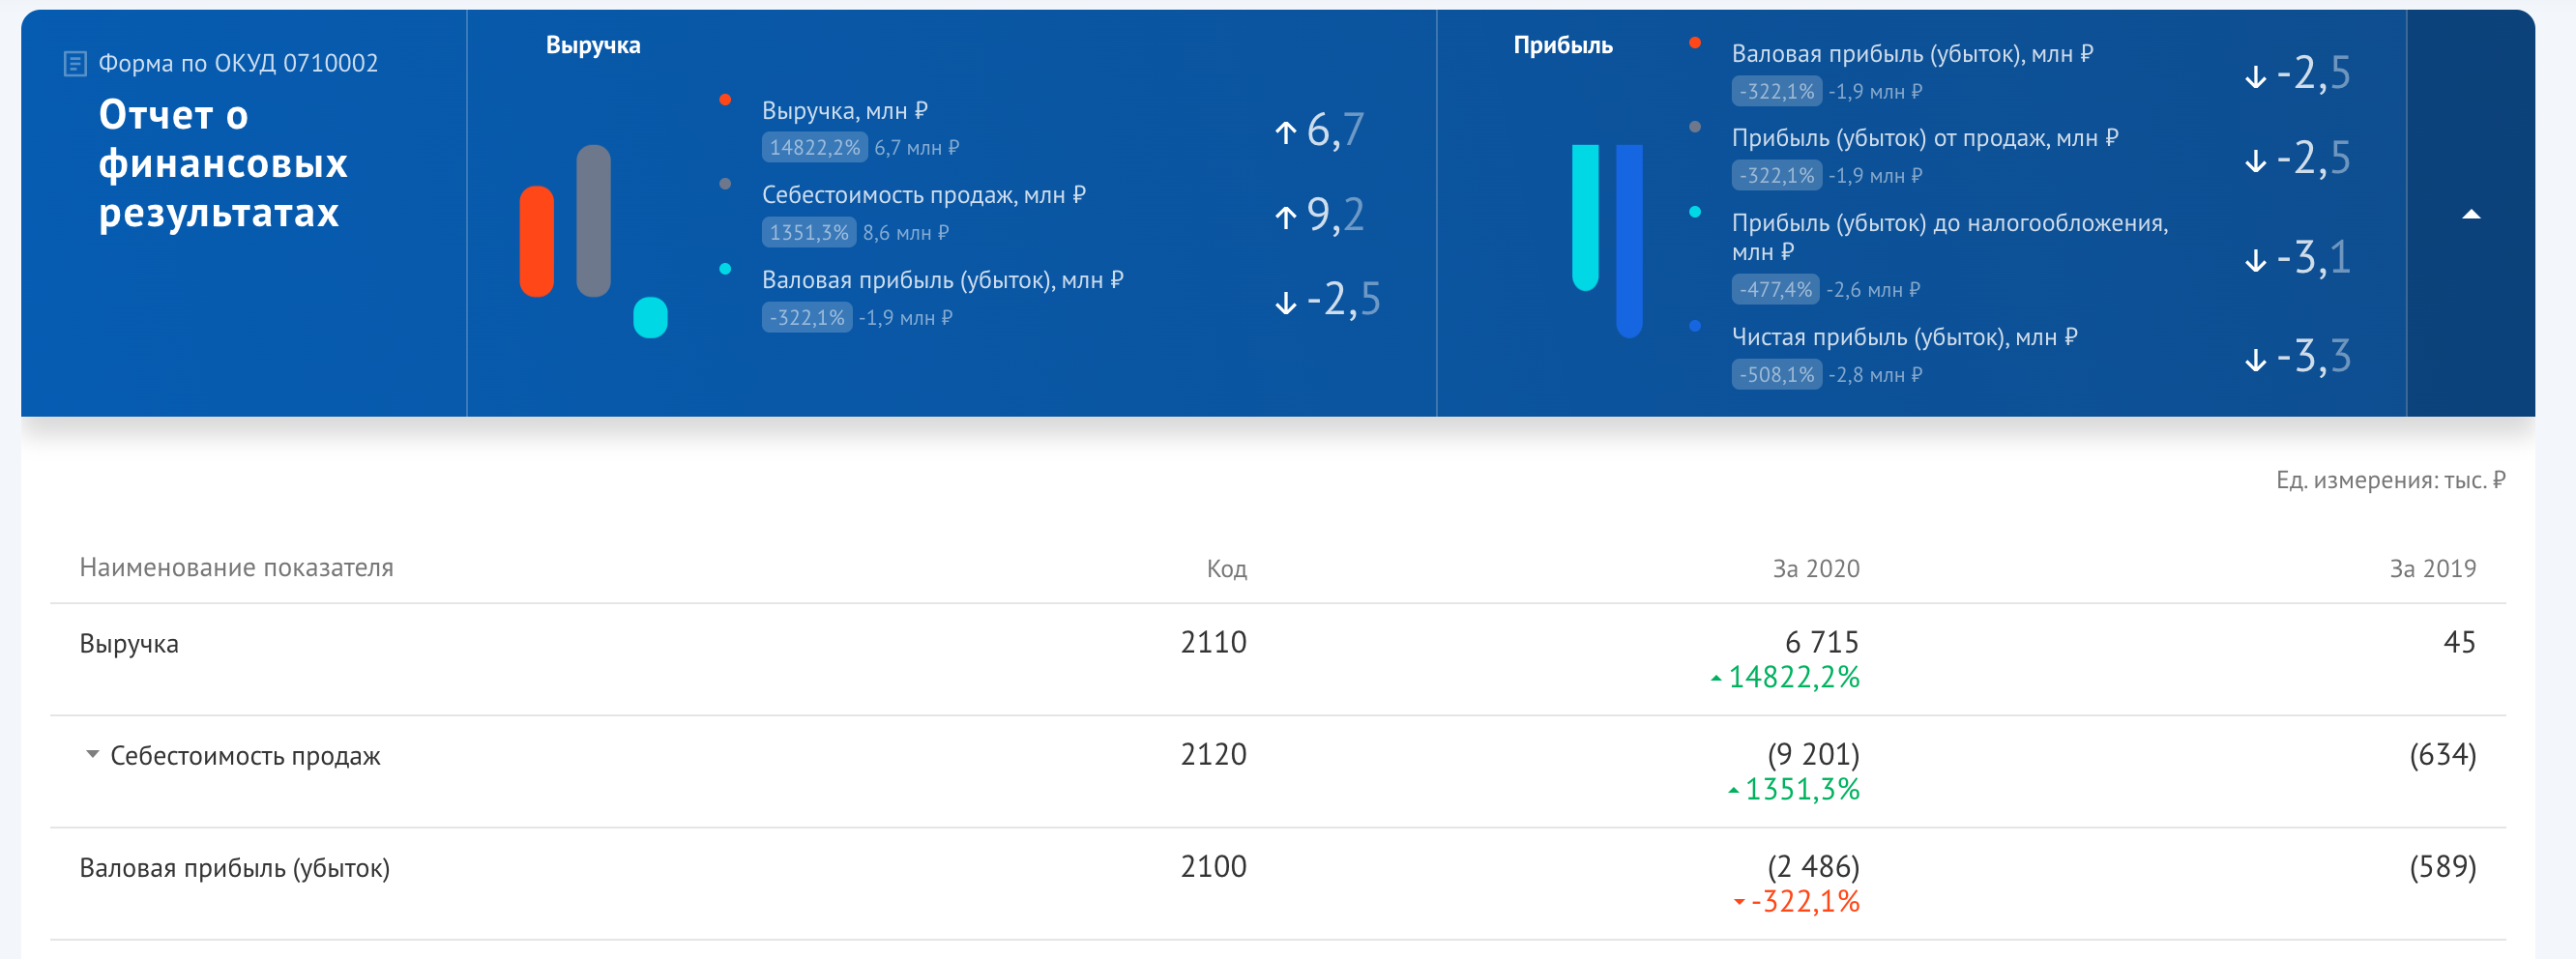

Однако заметим, что адрес карточки выглядит следующим образом:
https://bo.nalog.gov.ru/organizations-card/2373705

В то время как ИНН нашей компании - 5263039399

Получается, нужно получать номер организации, зная ИНН7

Вспомним, однако, что в результате расширенного поиска по ИНН сайт выдает нам, по сути, ссылку на карточку компании

Убедимся в этом с помощью инструментов разработчика

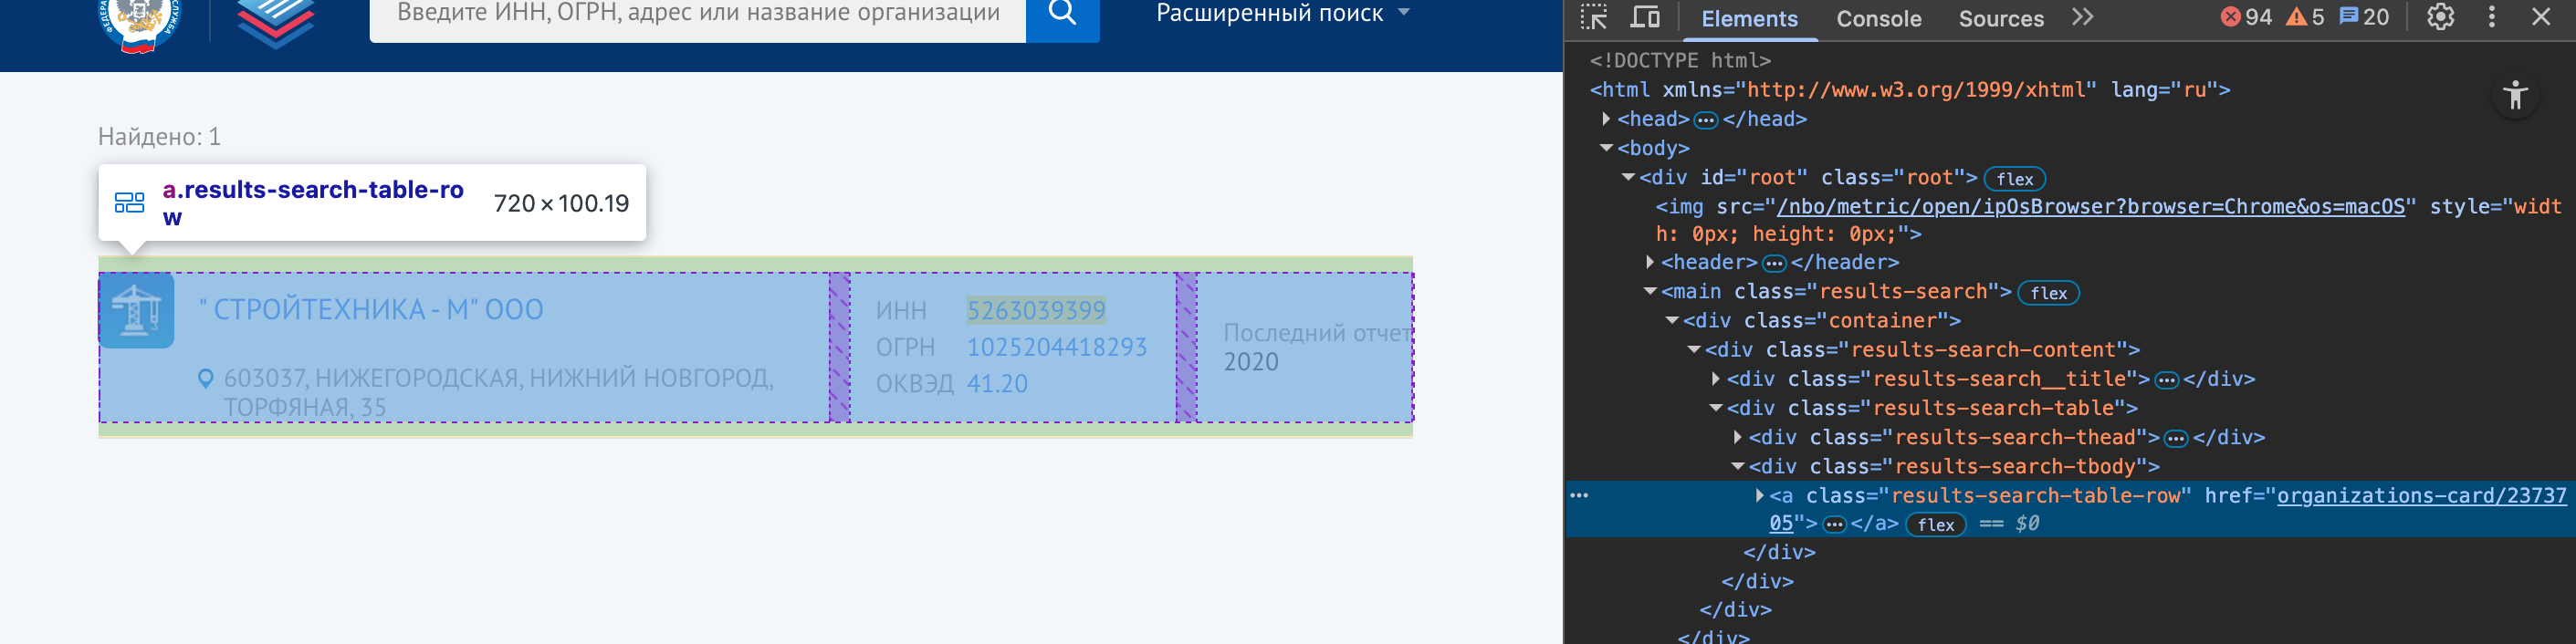

In [172]:
session = requests.Session()
url = "https://bo.nalog.gov.ru/"

In [173]:
response = session.get(url)

In [174]:
response.status_code

403

Понимаем, что наш запрос не выполняется, попробуем взять заголовки(headers) с сайта с помощью devTools

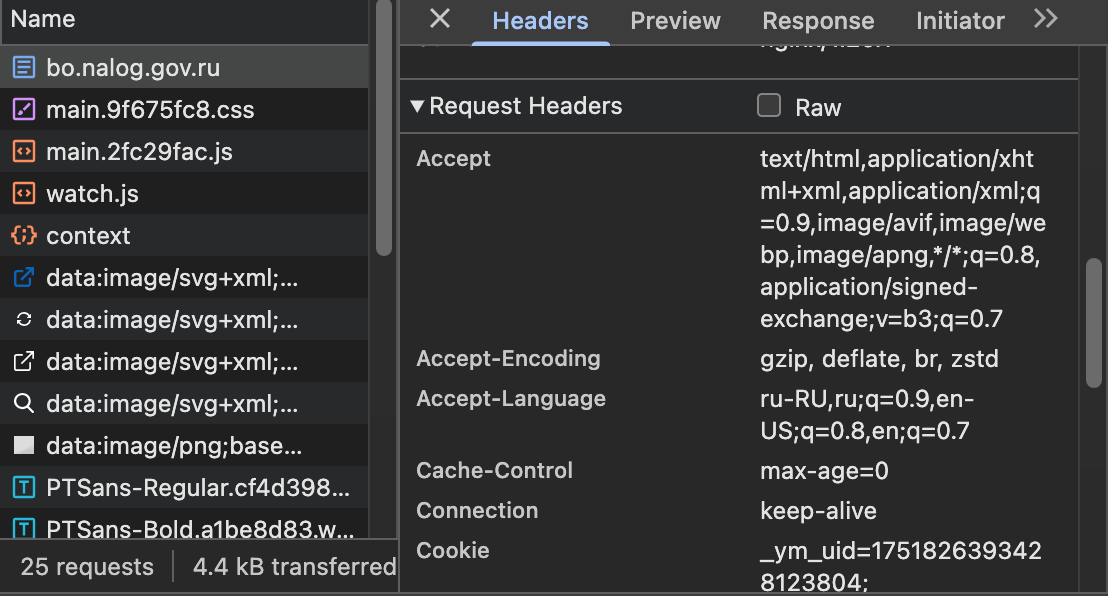

In [175]:
session.headers.update({
  "Accept": "application/json, text/plain, */*",
  "User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36",
  "Host" : "bo.nalog.gov.ru"
})

In [176]:
response = session.get("https://bo.nalog.gov.ru/search?allFieldsMatch=false&inn=5263039399")

In [177]:
response.status_code

200

Теперь все работает!

Заметим, что используя ссылку из запроса выше мы будем обращаться к самой странице, что тоже возможно, однако куда более удобно будет работать с json файлом(используя формат Json мы можем получить доступ к большей части информации, чем отображается на сайте,данные из Json будут чище чем из HTML.)

Чтобы узнать ссылку на него вновь обратимся к devTools. Заходим в Network, ставим фильтр XHR и ищем нужный ответ сервера.


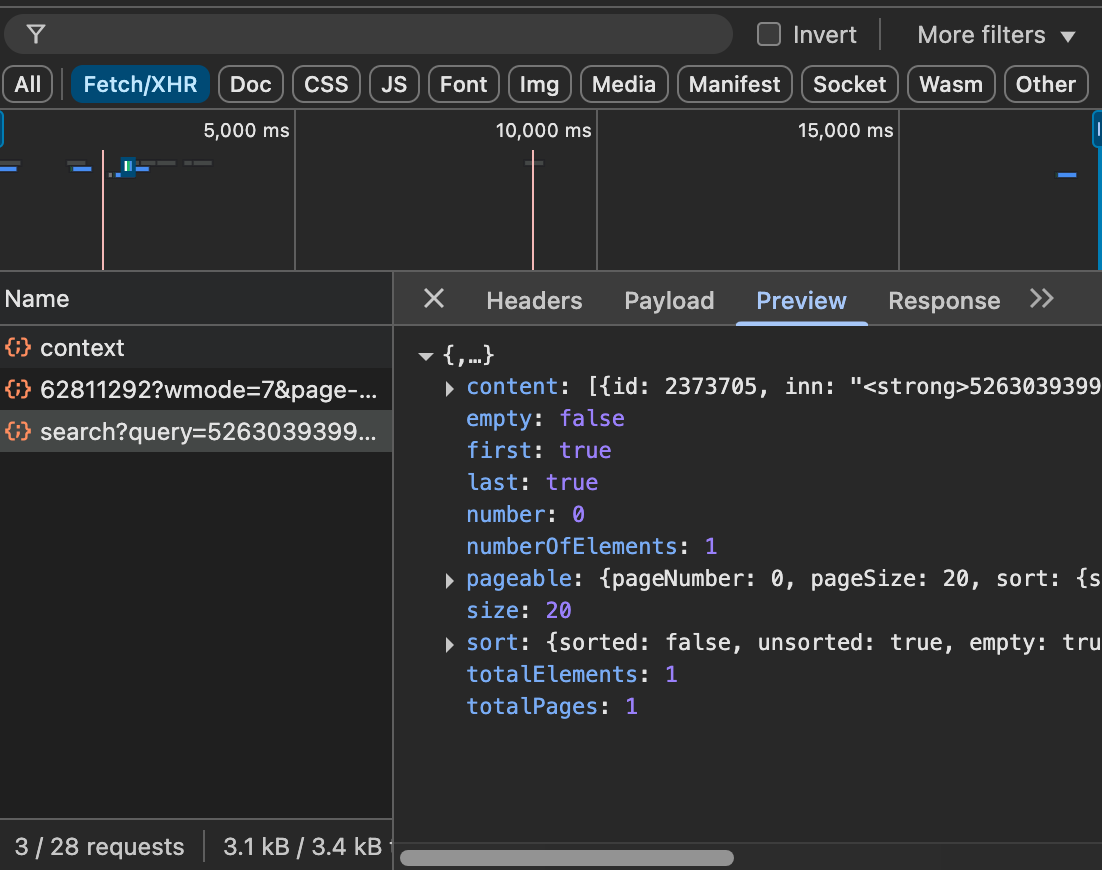


Получается, ссылка на json имеет следующий формат:

https://bo.nalog.gov.ru/advanced-search/organizations/search?query={inn}&page=0&size=20

Убедимся, что все работает, извлечем id нашей компании и перейдем к проделыванию данной операции для всех компаний

In [178]:
inns = [7801227976, 5263039399]
for inn in inns:
    response = session.get(f"https://bo.nalog.gov.ru/advanced-search/organizations/search?query={inn}&page=0&size=20").json()
    response
    if response['content']:
        print(response['content'][0]['id'])
    else:
        print("Отчетность не найдена")

Отчетность не найдена
2373705


Теперь мы умеем получать номер организации по ее ИНН, тогда найдем номера всех организаций и обрабатывать организации, для которых отчетность не найдена(на скриншоте ниже, можно посмотреть, что выдает поиск сайта в таком случае)

In [260]:
df.insert(6, "id", None)
df["id"].head()

21      None
53      None
4654    None
4669    None
4675    None
Name: id, dtype: object

In [261]:
df.head()

1    № п/п                                 Наименование / ФИО  \
21      20  "КОРПОРАЦИЯ ВИТ" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...   
53      52  "ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...   
4654  4653                         АКЦИОНЕРНОЕ ОБЩЕСТВО "777"   
4669  4668               АКЦИОНЕРНОЕ ОБЩЕСТВО "АГРОТЕХИМПОРТ"   
4675  4674                         АКЦИОНЕРНОЕ ОБЩЕСТВО "АКС"   

1         Тип субъекта            Категория           ОГРН         ИНН    id  \
21    Юридическое лицо    Малое предприятие  1025004907080  5038038838  None   
53    Юридическое лицо  Среднее предприятие  1025007270551  5027006369  None   
4654  Юридическое лицо    Малое предприятие  1021400692048  1414006922  None   
4669  Юридическое лицо    Малое предприятие  1043301806415  3327332190  None   
4675  Юридическое лицо    Малое предприятие  1027807999988  7816061297  None   

1                      Основной вид деятельности                     Регион  \
21    41.20 Строительство жилых и нежилых зданий    50 - Московская область   
53    41.20 Строительство жилых и нежилых зданий    50 - Московская область   
4654  41.20 Строительство жилых и нежилых зданий              77 - г.Москва   
4669  41.20 Строительство жилых и нежилых зданий  33 - Владимирская область   
4675  41.20 Строительство жилых и нежилых зданий     78 - г.Санкт-Петербург   

1         Район  ... Дата исключения из реестра Телефон E-mail  WWW  \
21    Пушкино г  ...                        NaN     NaN    NaN  NaN   
53          NaN  ...                        NaN     NaN    NaN  NaN   
4654        NaN  ...                        NaN     NaN    NaN  NaN   
4669        NaN  ...                        NaN     NaN    NaN  NaN   
4675        NaN  ...                        NaN     NaN    NaN  NaN   

1    Наличие лицензий Наличие заключенных договоров, контрактов  \
21                Нет                                       Нет   
53                 Да                                       Нет   
4654               Да                                       Нет   
4669               Да                                       Нет   
4675               Да                                       Нет   

1    Производство инновационной, высокотехнологичной продукции  \
21                                                  Нет          
53                                                  Нет          
4654                                                Нет          
4669                                                Нет          
4675                                                Нет          

1    Участие в программах партнерства Является социальным предприятием  \
21                                Нет                              Нет   
53                                Нет                              Нет   
4654                              Нет                              Нет   
4669                              Нет                              Нет   
4675                              Нет                              Нет   

1    Среднесписочная численность работников за предшествующий календарный год  
21                                                   36                        
53                                                  201                        
4654                                                 35                        
4669                                                 52                        
4675                                                 21                        

[5 rows x 24 columns]

In [264]:
df = df.reset_index()

In [267]:

for i in range(len(df["ИНН"])):
    inn = df["ИНН"].iloc[i]
    response = session.get(f"https://bo.nalog.gov.ru/advanced-search/organizations/search?query={inn}&page=0&size=20").json()
    if response['content']:
        df.loc[i, "id"] = response['content'][0]['id']
    else:
        df.loc[i, "id"] = "Отчетность не найдена"
df.head(10)

1  index № п/п                                 Наименование / ФИО  \
0     21    20  "КОРПОРАЦИЯ ВИТ" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...   
1     53    52  "ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...   
2   4654  4653                         АКЦИОНЕРНОЕ ОБЩЕСТВО "777"   
3   4669  4668               АКЦИОНЕРНОЕ ОБЩЕСТВО "АГРОТЕХИМПОРТ"   
4   4675  4674                         АКЦИОНЕРНОЕ ОБЩЕСТВО "АКС"   
5   4678  4677  АКЦИОНЕРНОЕ ОБЩЕСТВО "АКЦИОНЕРНАЯ ПРОИЗВОДСТВЕ...   
6   4682  4681  АКЦИОНЕРНОЕ ОБЩЕСТВО "АЛЕКСЕЕВСКАЯ ПЕРЕДВИЖНАЯ...   
7   4694  4693           АКЦИОНЕРНОЕ ОБЩЕСТВО "АМБЕР-СТРОЙСЕРВИС"   
8   4695  4694                      АКЦИОНЕРНОЕ ОБЩЕСТВО "АМИРУС"   
9   4711  4710                     АКЦИОНЕРНОЕ ОБЩЕСТВО "АРОВАНА"   

1      Тип субъекта            Категория           ОГРН         ИНН  \
0  Юридическое лицо    Малое предприятие  1025004907080  5038038838   
1  Юридическое лицо  Среднее предприятие  1025007270551  5027006369   
2  Юридическое лицо    Малое предприятие  1021400692048  1414006922   
3  Юридическое лицо    Малое предприятие  1043301806415  3327332190   
4  Юридическое лицо    Малое предприятие  1027807999988  7816061297   
5  Юридическое лицо    Малое предприятие  1023500875870  3525048992   
6  Юридическое лицо    Малое предприятие  1023101533883  3101000612   
7  Юридическое лицо    Малое предприятие  1025900534406  5902126804   
8  Юридическое лицо    Малое предприятие  1020501386443  0523005733   
9  Юридическое лицо    Малое предприятие  1165009053802  5009106346   

1                     id                   Основной вид деятельности  \
0                5872486  41.20 Строительство жилых и нежилых зданий   
1                6900709  41.20 Строительство жилых и нежилых зданий   
2                4980670  41.20 Строительство жилых и нежилых зданий   
3                3867230  41.20 Строительство жилых и нежилых зданий   
4                7041303  41.20 Строительство жилых и нежилых зданий   
5                6840082  41.20 Строительство жилых и нежилых зданий   
6                7244164  41.20 Строительство жилых и нежилых зданий   
7                2608351  41.20 Строительство жилых и нежилых зданий   
8                4659067  41.20 Строительство жилых и нежилых зданий   
9  Отчетность не найдена  41.20 Строительство жилых и нежилых зданий   

1                     Регион  ... Дата исключения из реестра Телефон E-mail  \
0    50 - Московская область  ...                        NaN     NaN    NaN   
1    50 - Московская область  ...                        NaN     NaN    NaN   
2              77 - г.Москва  ...                        NaN     NaN    NaN   
3  33 - Владимирская область  ...                        NaN     NaN    NaN   
4     78 - г.Санкт-Петербург  ...                        NaN     NaN    NaN   
5   35 - Вологодская область  ...                        NaN     NaN    NaN   
6  31 - Белгородская область  ...                        NaN     NaN    NaN   
7         59 - Пермский край  ...                        NaN     NaN    NaN   
8   05 - Республика Дагестан  ...                        NaN     NaN    NaN   
9    50 - Московская область  ...                        NaN     NaN    NaN   

1  WWW Наличие лицензий Наличие заключенных договоров, контрактов  \
0  NaN              Нет                                       Нет   
1  NaN               Да                                       Нет   
2  NaN               Да                                       Нет   
3  NaN               Да                                       Нет   
4  NaN               Да                                       Нет   
5  NaN              Нет                                       Нет   
6  NaN               Да                                       Нет   
7  NaN               Да                                       Нет   
8  NaN              Нет                                       Нет   
9  NaN              Нет                                       Нет   

1 Производство инновационной, высок

In [268]:
dfWithIdCopy = df.copy()

In [279]:
df = df[df["id"] != 'Отчетность не найдена']
df = df[:-10]
df

1      index   № п/п                                 Наименование / ФИО  \
0         21      20  "КОРПОРАЦИЯ ВИТ" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...   
1         53      52  "ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...   
2       4654    4653                         АКЦИОНЕРНОЕ ОБЩЕСТВО "777"   
3       4669    4668               АКЦИОНЕРНОЕ ОБЩЕСТВО "АГРОТЕХИМПОРТ"   
4       4675    4674                         АКЦИОНЕРНОЕ ОБЩЕСТВО "АКС"   
...      ...     ...                                                ...   
8912  540687  540686        ПРОИЗВОДСТВЕННЫЙ КООПЕРАТИВ "МСС-ВОЛГОГРАД"   
8913  540691  540690   ПРОИЗВОДСТВЕННЫЙ КООПЕРАТИВ "НИЖНЕКАМСКГЭССТРОЙ"   
8914  540739  540738      ПРОИЗВОДСТВЕННЫЙ КООПЕРАТИВ "СОЛНЕЧНОГОРСКИЙ"   
8915  540749  540748            ПРОИЗВОДСТВЕННЫЙ КООПЕРАТИВ "СПЕЦСТРОЙ"   
8916  540783  540782              ПРОИЗВОДСТВЕННЫЙ КООПЕРАТИВ "ЭВЕРЕСТ"   

1         Тип субъекта            Категория           ОГРН         ИНН  \
0     Юридическое лицо    Малое предприятие  1025004907080  5038038838   
1     Юридическое лицо  Среднее предприятие  1025007270551  5027006369   
2     Юридическое лицо    Малое предприятие  1021400692048  1414006922   
3     Юридическое лицо    Малое предприятие  1043301806415  3327332190   
4     Юридическое лицо    Малое предприятие  1027807999988  7816061297   
...                ...                  ...            ...         ...   
8912  Юридическое лицо    Малое предприятие  1153443016968  3461057004   
8913  Юридическое лицо    Малое предприятие  1021602015731  1650005551   
8914  Юридическое лицо    Малое предприятие  1155044000880  5044093805   
8915  Юридическое лицо    Малое предприятие  1195081098310  5043068595   
8916  Юридическое лицо    Малое предприятие  1182468027367  2411028648   

1           id                   Основной вид деятельности  \
0      5872486  41.20 Строительство жилых и нежилых зданий   
1      6900709  41.20 Строительство жилых и нежилых зданий   
2      4980670  41.20 Строительство жилых и нежилых зданий   
3      3867230  41.20 Строительство жилых и нежилых зданий   
4      7041303  41.20 Строительство жилых и нежилых зданий   
...        ...                                         ...   
8912   9292649  41.20 Строительство жилых и нежилых зданий   
8913   7209729  41.20 Строительство жилых и нежилых зданий   
8914   9162402  41.20 Строительство жилых и нежилых зданий   
8915  11215151  41.20 Строительство жилых и нежилых зданий   
8916  10653011  41.20 Строительство жилых и нежилых зданий   

1                                    Регион  ... Дата исключения из реестра  \
0                   50 - Московская область  ...                        NaN   
1                   50 - Московская область  ...                        NaN   
2                             77 - г.Москва  ...                        NaN   
3                 33 - Владимирская область  ...                        NaN   
4                    78 - г.Санкт-Петербург  ...                        NaN   
...                                     ...  ...                        ...   
8912             34 - Волгоградская область  ...                        NaN   
8913  16 - Республика Татарстан (Татарстан)  ...                        NaN   
8914                50 - Московская область  ...                        NaN   
8915                50 - Московская область  ...                        NaN   
8916                 24 - Красноярский край  ...                        NaN   

1    Телефон E-mail  WWW Наличие лицензий  \
0        NaN    NaN  NaN              Нет   
1        NaN    NaN  NaN               Да   
2        NaN    NaN  NaN               Да   
3        NaN    NaN  NaN               Да   
4        NaN    NaN  NaN               Да   
...      ...    ...  ...              ...   
8912     NaN    NaN  NaN               Да   
8913     NaN    NaN  NaN              Нет   
8914     NaN    NaN  NaN              Нет   
8915     NaN    NaN  NaN              Нет   
8916     NaN    NaN  

Теперь мы знаем номер каждой организации(карточки), соответственно, можем собрать всю необходимую информацию для дальнейшей работы

## Расчет EBIT

 Показатель EBIT (earnings before interest and taxes — прибыль до вычета процентов и налогов) -  является промежуточным показателем прибыли до уплаты процентов и налогов.

EBIT — один из ключевых показателей эффективности работы компании. Он помогает понять, насколько хорошо работает бизнес, даже если отвлечься от других факторов, таких как расходы на налоги или процентные выплаты. 

Отметим, что EBIT часто рассматривается в совокупности с EBITDA. Однако, по данным ФНС мы не можем рассчитать амортизацию, поэтому в нашей работе ограничимся лишь показателем EBIT

Необходимые данные для расчета EBIT расположены на странице организации, в разделе "Отчет о финансовых результатах"
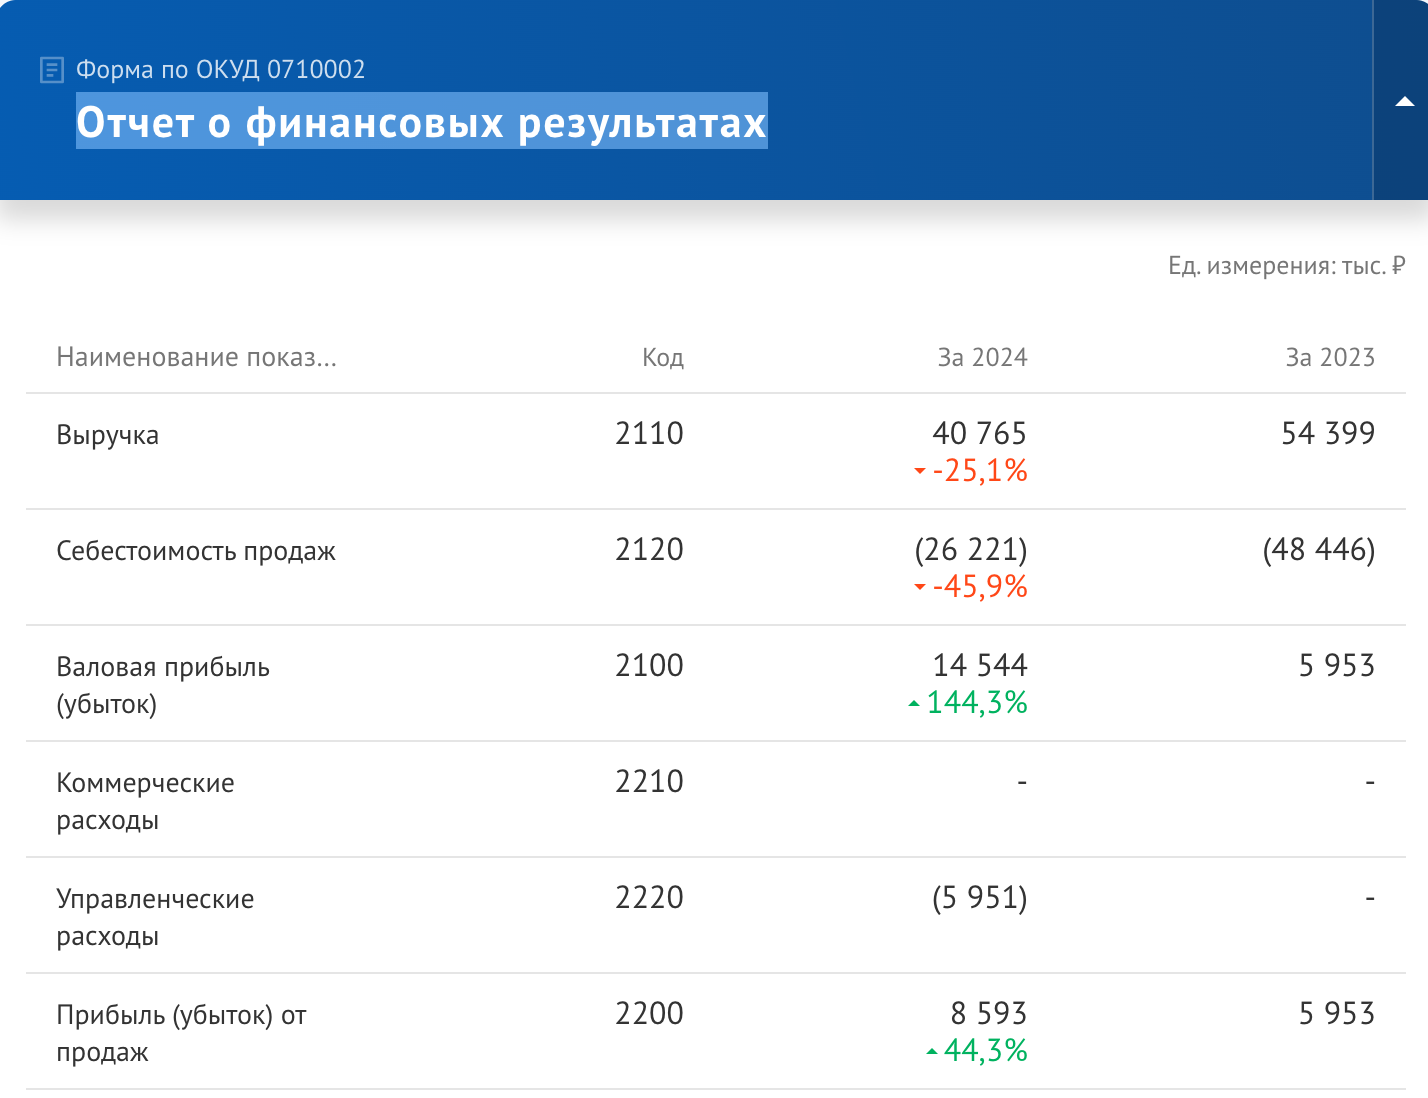

Для расчета EBIT существует несколько формул, мы же, исходя из доступной нам информации, будем пользоваться следующей:

## EBIT = 2300 Прибыль до налогообложения + строка 2330 Проценты к уплате. ## 

Как и ранее, найдем json файл, в котором содержится информация о финансовых результатах компании. В этот раз, ссылка выглядит следующим образом:

https://bo.nalog.gov.ru/nbo/organizations/{id}/bfo/

Приступим к расчету EBITDA 

<b>!!Все денежные показатели рассчитываются в тыс. ₽</b>

In [281]:
arrs = []
for id in df[df["id"] != "Отчетность не найдена"]["id"]:
    
    iddict = {}
    iddict["id"] = id
    response = session.get(f"https://bo.nalog.gov.ru/nbo/organizations/{id}/bfo/").json()
    
    for i in response:
        fResult = i["typeCorrections"][0]["correction"].get("financialResult", 0)
        if fResult != 0:
            cur2300 = fResult.get("current2300", float('inf'))
            cur2330 = abs(fResult.get("current2330", 0))
            iddict[i["period"]] = cur2300 + cur2330
    arrs.append(iddict)

In [282]:
res = pd.json_normalize(arrs)
res.head()

id     2024      2023     2022     2021     2020
0  5872486 -18417.0  -17331.0  20360.0   9031.0  14627.0
1  6900709  37887.0  730016.0  42801.0  25839.0  37674.0
2  4980670  71787.0   28513.0   7409.0   7940.0  -3607.0
3  3867230  61184.0   50126.0  38067.0  26125.0  23696.0
4  7041303      inf       inf    574.0   1385.0   6334.0

In [289]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8844 entries, 0 to 8843
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8844 non-null   int64  
 1   2024    7693 non-null   float64
 2   2023    8232 non-null   float64
 3   2022    8706 non-null   float64
 4   2021    8396 non-null   float64
 5   2020    8185 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 414.7 KB


In [291]:
resCopy = res.copy()

In [353]:
res = res.replace([np.inf, -np.inf], np.nan)

In [354]:
res

id     2024      2023     2022     2021     2020
0      5872486 -18417.0  -17331.0  20360.0   9031.0  14627.0
1      6900709  37887.0  730016.0  42801.0  25839.0  37674.0
2      4980670  71787.0   28513.0   7409.0   7940.0  -3607.0
3      3867230  61184.0   50126.0  38067.0  26125.0  23696.0
4      7041303      NaN       NaN    574.0   1385.0   6334.0
...        ...      ...       ...      ...      ...      ...
8839   9292649   4336.0     173.0   -658.0  -4832.0  -6068.0
8840   7209729    815.0     162.0  -4069.0   8444.0   2783.0
8841   9162402      NaN       NaN      NaN      NaN      NaN
8842  11215151      NaN       NaN      NaN      NaN      NaN
8843  10653011      NaN       NaN      NaN      NaN      NaN

[8844 rows x 6 columns]

Посмотрим на динамику EBIT по годам, для этого построим график среднего EBIT за год для всех годов.

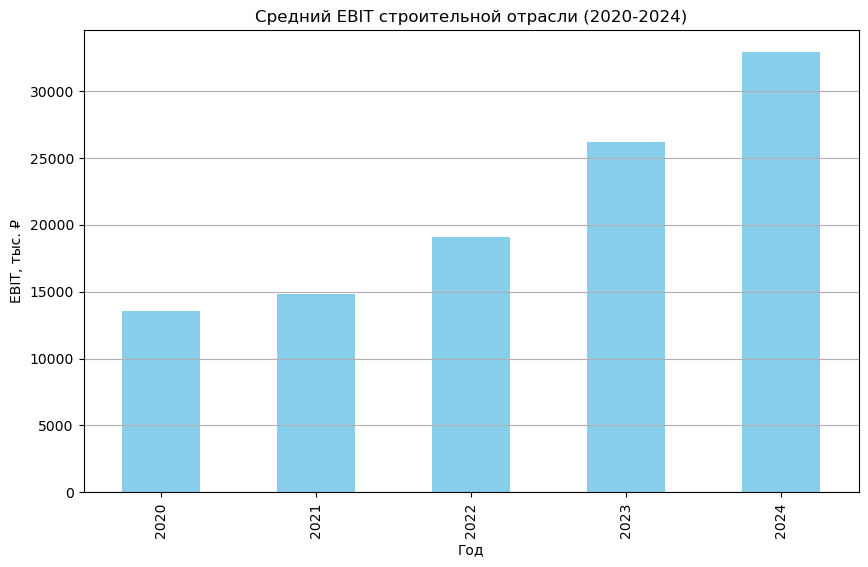

In [355]:
mean_ebit = res.iloc[:, :0:-1].mean()
plt.figure(figsize=(10, 6))
mean_ebit.plot(kind='bar', color='skyblue')
plt.title('Средний EBIT строительной отрасли (2020-2024)')
plt.ylabel('EBIT, тыс. ₽')
plt.xlabel('Год')
plt.grid(axis='y')
plt.show()

Boxplot отдельно для прибыльных и убыточных компаний

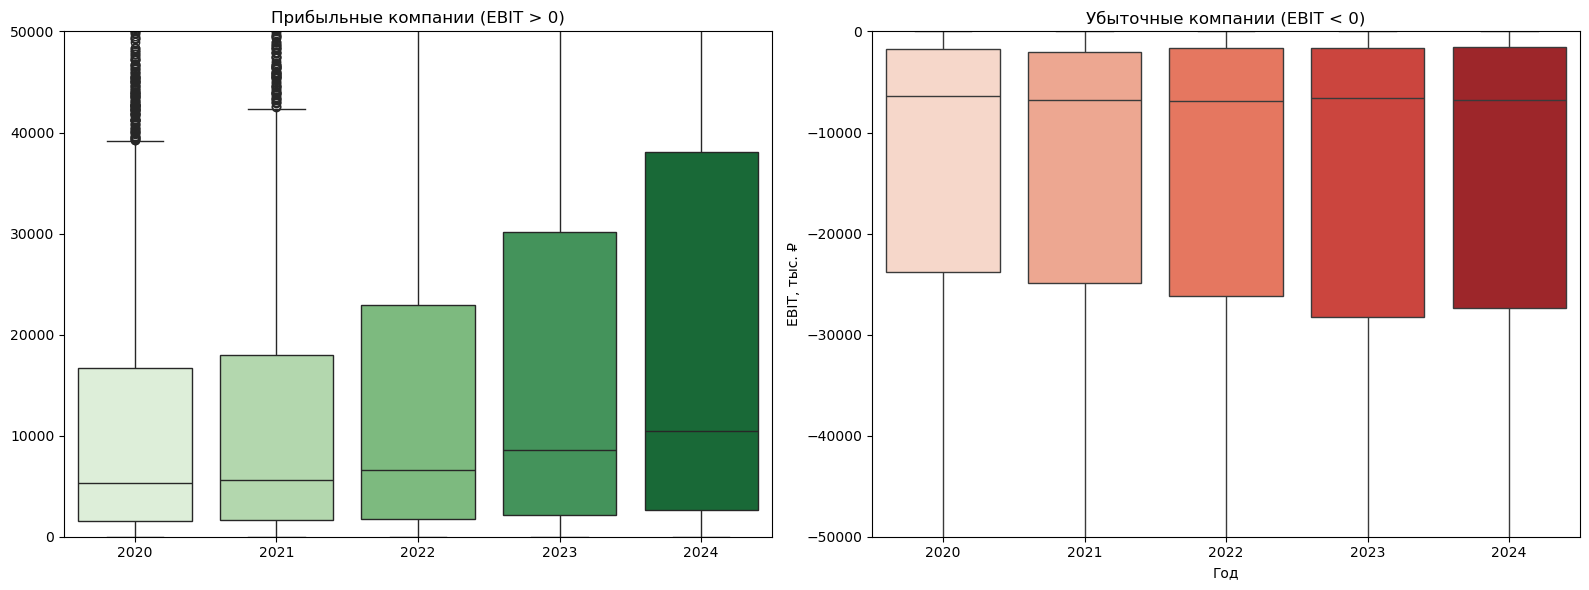

In [361]:
year_columns = ['2020', '2021', '2022', '2023', '2024']
ebit_data = res[year_columns]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Прибыльные компании
sns.boxplot(data=ebit_data[ebit_data > 0].clip(upper=100000), ax=ax1, palette="Greens")
ax1.set_title('Прибыльные компании (EBIT > 0)')
ax1.set_ylim(0, 50000)

# Убыточные компании
sns.boxplot(data=ebit_data[ebit_data < 0].clip(lower=-100000), ax=ax2, palette="Reds")
ax2.set_title('Убыточные компании (EBIT < 0)')
ax2.set_ylim(-50000, 0)


plt.tight_layout()
plt.show()

Violin plot

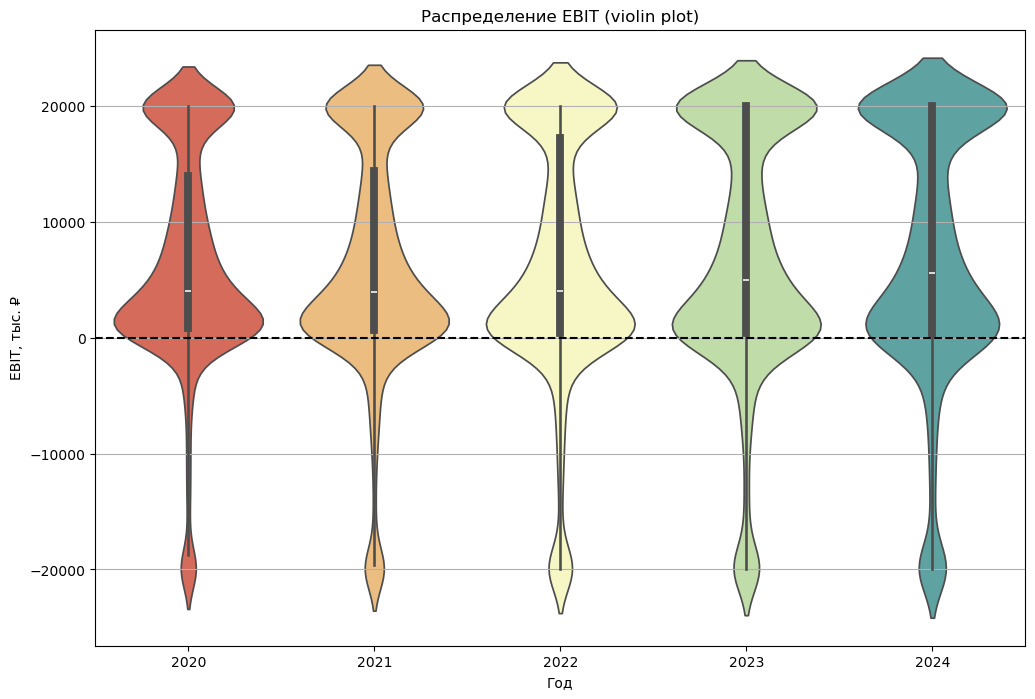

In [362]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=ebit_data.clip(lower=-20000, upper=20000), palette="Spectral")
plt.title('Распределение EBIT (violin plot)')
plt.axhline(y=0, color='k', linestyle='--')
plt.grid(axis='y')
plt.ylabel('EBIT, тыс. ₽')
plt.xlabel('Год')
plt.show()

Динамику доли убыточных компаний

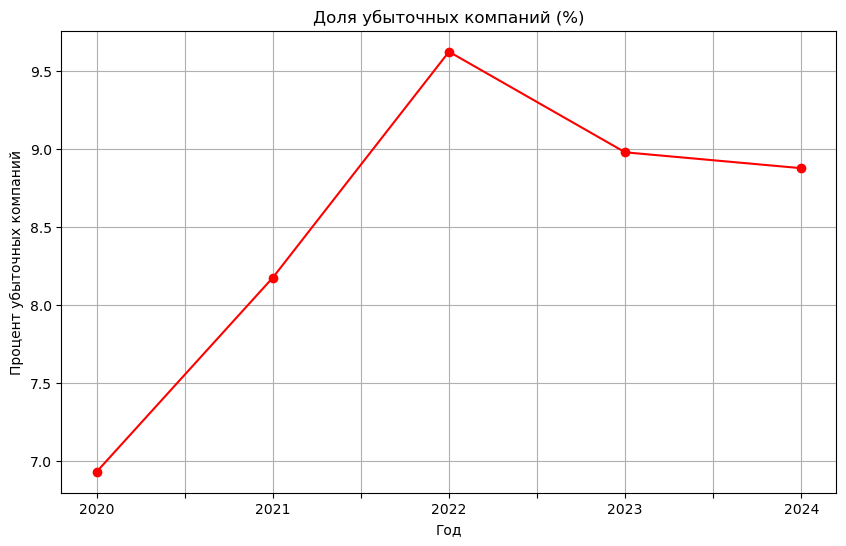

In [326]:
loss_ratio = (res.iloc[:, :0:-1] < 0).mean() * 100
plt.figure(figsize=(10, 6))
loss_ratio.plot(kind='line', marker='o', color='red')
plt.title('Доля убыточных компаний (%)')
plt.ylabel('Процент убыточных компаний')
plt.xlabel('Год')
plt.grid()
plt.show()

Взглянем также на основные метрики

In [329]:
metrics = pd.DataFrame({
    'Рост EBIT': (res['2024'] - res['2020']).mean(),
    'Волатильность EBIT': cv_ebit.mean(),
    'Доля убыточных 2024': (res['2024'] < 0).mean(),
    'Доля компаний с ростом EBIT': ((res['2024'] > res['2020']).sum() / len(res))
}, index=['Отрасль 41.20'])

print(metrics.T)

                             Отрасль 41.20
Рост EBIT                     14301.993623
Волатильность EBIT                0.963841
Доля убыточных 2024               0.088761
Доля компаний с ростом EBIT       0.252148


## Выводы по анализу EBIT

1.Положительные выводы:

EBIT компаний растет(наблюдается практически двукратный рост по сравнению с 2020)

Доля убыточных компаний снижается(не считая кризисного 2022 года)

Отрасль смогла восстановиться после кризиса 2022 года

2. Риски отрасли

Заметим, что рост EBIT наблюдается лишь у четверти компаний отрасли, стабильные убытки у примерно 9%, а волатилность крайне высока(0.96!). 

Это говорит нам о том, что отрасль перспективна лишь избирательно(предположим, что перспективу имеют компании, работающие по госзаказам и занимающиеся нежилыми помещениями). Отрасль же в целом нельзя назвать перспективной, однако в ней есть явные лидеры, которые активно растут, в то время как "аутсайдеры" не усугубляют свое положение и не разоряются(более того, отрасль пережила кризис и восстановилась)

## Чистая прибыль

Соберем информацию о чистой прибыли по годам для каждой компании.
Чистая прибыль указывается в графе 2400.

In [335]:
arrs2400 = []
for id in df[df["id"] != "Отчетность не найдена"]["id"]:
    
    iddict = {}
    iddict["id"] = id
    response = session.get(f"https://bo.nalog.gov.ru/nbo/organizations/{id}/bfo/").json()
    
    for i in response:
        fResult = i["typeCorrections"][0]["correction"].get("financialResult", 0)
        if fResult != 0:
            cur2400 = fResult.get("current2400", np.nan)
            iddict[i["period"]] = cur2400
    arrs2400.append(iddict)

In [339]:
resP = pd.json_normalize(arrs2400)
resP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8844 entries, 0 to 8843
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8844 non-null   int64  
 1   2024    7568 non-null   float64
 2   2023    8133 non-null   float64
 3   2022    8621 non-null   float64
 4   2021    8337 non-null   float64
 5   2020    8148 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 414.7 KB


In [364]:
resP


id      2024      2023      2022      2021     2020
0      5872486  -20129.0  -20913.0   19518.0    3080.0  -8543.0
1      6900709   28998.0  582441.0   31442.0   20376.0  29618.0
2      4980670   54850.0   19889.0    3375.0    2092.0  -5382.0
3      3867230   47723.0   40101.0   30374.0   20565.0  18957.0
4      7041303   11674.0     565.0     444.0    1077.0   5273.0
...        ...       ...       ...       ...       ...      ...
8839   9292649    3390.0     133.0   -1152.0   -4910.0  -6143.0
8840   7209729     463.0       9.0   -4795.0    6709.0   2142.0
8841   9162402       0.0    2217.0    2803.0    8008.0   4950.0
8842  11215151       NaN       NaN       NaN    5357.0   7179.0
8843  10653011  168938.0   83188.0  134591.0  107015.0  74494.0

[8844 rows x 6 columns]

In [ ]:
Построим графике, где по оси x отложим процент роста чистой прибыли компании за последние N лет, а по y - количество таких компаний(x - целое число)

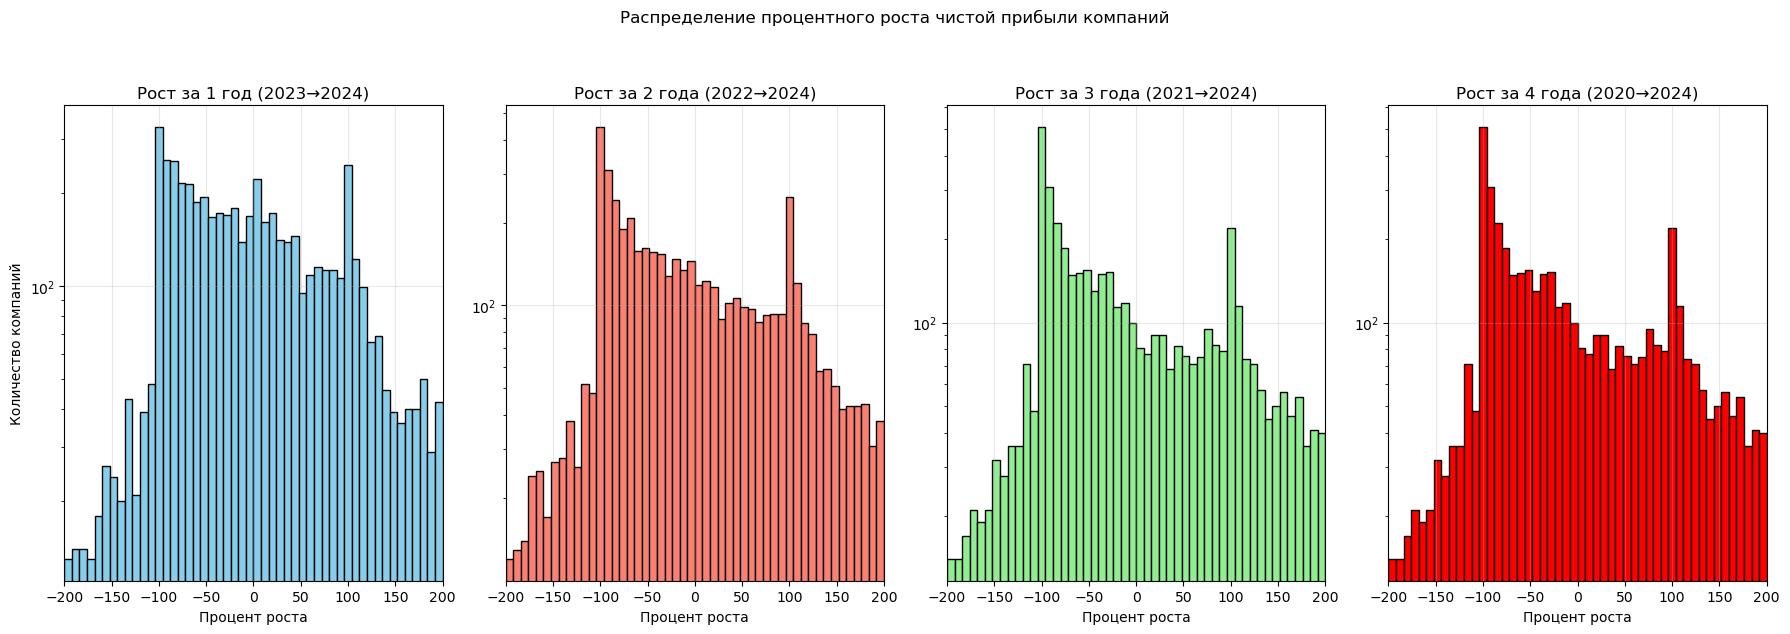

In [399]:


# Подготовка данных
resP = resP.replace([np.inf, -np.inf], np.nan)  # Очистка от бесконечностей

# Функция для расчета процентного роста
def calculate_growth(df, years_back):
    growth_data = []
    current = str(2024)
    previous = str(2024 - years_back)
    mask = df[current].notna() & df[previous].notna() & (df[previous] != 0)
    growth = (df.loc[mask, current] - df.loc[mask, previous]) / np.abs(df.loc[mask, previous]) * 100
    growth = growth.round().astype(int)  # Округление до целых
    growth_data.extend(growth.tolist())
    return pd.Series(growth_data)

# Создаем фигуру с тремя подграфиками
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
plt.suptitle('Распределение процентного роста чистой прибыли компаний', y=1.05)

# График для 1 года
growth_1y = calculate_growth(resP, 1)
axes[0].hist(growth_1y, bins=50, range=(-200, 200), color='skyblue', edgecolor='black')
axes[0].set_title('Рост за 1 год (2023→2024)')
axes[0].set_xlabel('Процент роста')
axes[0].set_ylabel('Количество компаний')
axes[0].grid(True, alpha=0.3)

# График для 2 лет
growth_2y = calculate_growth(resP, 2)
axes[1].hist(growth_2y, bins=50, range=(-200, 200), color='salmon', edgecolor='black')
axes[1].set_title('Рост за 2 года (2022→2024)')
axes[1].set_xlabel('Процент роста')
axes[1].grid(True, alpha=0.3)

# График для 3 лет
growth_3y = calculate_growth(resP, 3)
axes[2].hist(growth_3y, bins=50, range=(-200, 200), color='lightgreen', edgecolor='black')
axes[2].set_title('Рост за 3 года (2021→2024)')
axes[2].set_xlabel('Процент роста')
axes[2].grid(True, alpha=0.3)

# График для 4 лет
growth_4y = calculate_growth(resP, 4)
axes[3].hist(growth_3y, bins=50, range=(-200, 200), color='red', edgecolor='black')
axes[3].set_title('Рост за 4 года (2020→2024)')
axes[3].set_xlabel('Процент роста')
axes[3].grid(True, alpha=0.3)

# Общие настройки
for ax in axes:
    ax.set_xlim(-200, 200)
    ax.set_yscale('log')  # Логарифмическая шкала для Y

plt.tight_layout()
plt.show()

Наблюдаем интересное, практически бимодальное распределение, в котором чистая прибыль компаний либо увеличивается в два раза, либо уменьшается.

При этом, несмотря на то, что компаний, чистая прибыль которых уменьшилась почти в 2 раза, больше, компаний, которые уходят в сильный минус крайне мало.

In [ ]:
Вообще, интересно было бы сравнить динамику  EBIT и чистой прибыли на одном графике

<Figure size 1200x600 with 0 Axes>

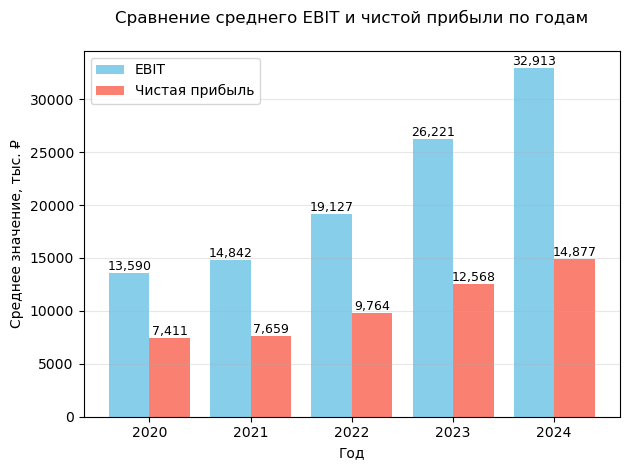

In [401]:
res = res.replace([np.inf, -np.inf], np.nan)
resP = resP.replace([np.inf, -np.inf], np.nan)

# Вычисляем средние значения по годам
mean_ebit = res.iloc[:, :0:-1].mean()  # Средний EBIT (исключаем столбец id)
mean_net_profit = resP.iloc[:, 1:].mean()  # Средняя чистая прибыль

# Создаем DataFrame для удобного построения
comparison_df = pd.DataFrame({
    'EBIT': mean_ebit,
    'Чистая прибыль': mean_net_profit
})

# Строим график
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', color=['skyblue', 'salmon'], width=0.8)
plt.title('Сравнение среднего EBIT и чистой прибыли по годам', pad=20)
plt.ylabel('Среднее значение, тыс. ₽')
plt.xlabel('Год')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Добавляем подписи значений
for i in range(len(comparison_df)):
    for j, col in enumerate(comparison_df.columns):
        value = comparison_df.iloc[i, j]
        plt.text(i - 0.2 + j*0.4, value, f'{value:,.0f}', 
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Замечаем, что среднее EBIT в два раза больше средней чистой прибыли

## География топ-500 компаний по выручке 

Выручка компании пишется под кодом 2110, место регистрации прописано в json файле в следующем виде:
"address":"141207, Московская обл, г Пушкино, ул Чехова, д 12, 901"


In [440]:
arrs500 = []
for id in df[df["id"] != "Отчетность не найдена"]["id"]:
    
    iddict = {}
    iddict["id"] = id
    response = session.get(f"https://bo.nalog.gov.ru/nbo/organizations/{id}/bfo/").json()[0]
    
    fResult = response["typeCorrections"][0]["correction"].get("financialResult", 0)
    if fResult != 0:
        cur2110 = fResult.get("current2110", np.nan)
        address = response["organizationInfo"].get("address", 0)
        if address != 0:
            iddict["last_year"] = cur2110
            iddict["address"] = address
            arrs500.append(iddict)

In [441]:
resA = pd.json_normalize(arrs500)
resA

id  last_year                                            address
0      5872486   112540.0  141207, Московская обл, г Пушкино, ул Чехова, ...
1      6900709   429496.0  140093, Московская обл, Дзержинский г, Угрешск...
2      4980670  1107569.0  678144, Саха /Якутия/ респ, Ленский муниципаль...
3      3867230  1297470.0     Владимир г, Александра Матросова ул, 1, 600005
4      7041303   782668.0  192102, Город Санкт-Петербург, вн.тер. г. Муни...
...        ...        ...                                                ...
8837   9292649    19358.0  400080, Волгоградская обл, Волгоград г, им Дов...
8838   7209729   256053.0  423800, Татарстан респ, г Набережные Челны, пр...
8839   9162402        0.0  141532, Московская обл, Солнечногорск г, Берсе...
8840  11215151    13987.0  643,142200,50,,Серпухов г,,Ворошилова ул,126а,...
8841  10653011   274919.0  Красноярский край, р-н Емельяновский, пгт Емел...

[8842 rows x 3 columns]

In [448]:
resB = resA.sort_values(by=['last_year'], ascending=False).head(500).reset_index()

In [449]:
resB

index        id   last_year  \
0      472   5350656  82305408.0   
1     2741   7320210  14352296.0   
2     8333   7144909  11797815.0   
3     3664  11471870  10534471.0   
4     7601  10092170   9683656.0   
..     ...       ...         ...   
495   1106   1407898   1214854.0   
496   1640   8057040   1213390.0   
497   3747   8131652   1213388.0   
498   4276   8201460   1211829.0   
499   5410   7451518   1211679.0   

                                               address  
0    197375, Санкт-Петербург г, ул 2-я Алексеевская...  
1    108814, Город Москва, вн.тер.г. муниципальный ...  
2    111024, Город Москва, вн.тер.г. муниципальный ...  
3    249833, Калужская область, м.р-н Дзержинский, ...  
4    121471, Москва г, Можайское ш., д. № 29, этаж ...  
..                                                 ...  
495  196626, Город Санкт-Петербург, п. Шушары, ш. М...  
496  629305, Ямало-Ненецкий АО, г Новый Уренгой, ул...  
497  614039, Пермский край, г Пермь, ул Сибирская, ...  
498  142410, Московская область, г.о. Богородский, ...  
499  654006, Кемеровская область - Кузбасс обл, г Н...  

[500 rows x 4 columns]

<b>Мы видим, что адрес регистрации представлен не в виде географических координат, поэтому, придется пользоваться геокодером </b>

In [451]:
from geopy.geocoders import Nominatim
import folium

In [561]:
geolocator = Nominatim(user_agent="geo_map_app")

In [456]:
resB["address"][1]

'108814, Город Москва, вн.тер.г. муниципальный округ Коммунарка, ш. Калужское, км 24-й, д. 1, стр. 1, этаж 6,пом.XIII,ком.25 офис 619/1'

In [562]:
#Функция, возвращающая координаты по аддресу, если это возможно
def get_coordinates(info):
    try:
        location = geolocator.geocode(info)
        if location:
            return location.latitude, location.longitude
        return None
    except:
        return None

In [563]:
coords = [get_coordinates('108814, Город Москва, вн.тер.г. муниципальный округ Коммунарка, ш. Калужское, км 24-й, д. 1, стр. 1, этаж 6,пом.XIII,ком.25 офис 619/1')]

In [564]:
coords

[None]

Видим, что с полными адресами geocode не умеет работать, поэкспериментируем с форматом адреса

In [565]:
coords, coords1, coords2  = [get_coordinates('Город Москва')], [get_coordinates('г Москва')], [get_coordinates('Москва, Россия')]

In [566]:
coords, coords1, coords2

([(55.7505412, 37.6174782)],
 [(55.7288241, 37.6450364)],
 [(55.625578, 37.6063916)])

In [503]:
cr = [get_coordinates("Пермский край")]

In [504]:
cr

[(58.5951603, 56.3159546)]

Тогда, возьмем второй элемент из строки адресса(он содержит либо название региона, либо название города, этого нам будет достаточно чтобы просмотреть географию)

In [509]:
resBcopy = resB.copy()

In [528]:
def addres_to_city(x):
    strs = x.split(", ")
    if len(strs) > 1:
        return strs[1]
    else:
        return "Россия"
    

In [533]:
resB["address"] = resB["address"].apply(addres_to_city)

In [535]:
resB.insert(3, "coords", None)

In [585]:
import time
for i in tqdm(range(len(resB["address"]))):  
    coordinates = get_coordinates(resB["address"].iloc[i])
    resB.loc[i, "coords"] = str(coordinates) if coordinates else np.nan
    time.sleep(1)  # Пауза 1 секунда между запросами


resB.head(10)

100%|█████████████████████████████████████████| 500/500 [10:01<00:00,  1.20s/it]


index        id   last_year                    coords             address
0    472   5350656  82305408.0  (59.9548139, 30.3246507)   Санкт-Петербург г
1   2741   7320210  14352296.0  (55.7505412, 37.6174782)        Город Москва
2   8333   7144909  11797815.0  (55.7505412, 37.6174782)        Город Москва
3   3664  11471870  10534471.0  (54.4382773, 35.5272854)   Калужская область
4   7601  10092170   9683656.0  (55.7288241, 37.6450364)            Москва г
5   4084   9013643   8173638.0   (55.8204953, 78.866158)   Новосибирская обл
6   8050   2412950   7907977.0  (55.7505412, 37.6174782)        Город Москва
7   4853  11726920   7685586.0  (55.5043158, 38.0353929)  Московская область
8   1966   2094292   7507051.0  (59.9548139, 30.3246507)  Г. Санкт-Петербург
9   5603    272516   7485337.0  (55.7288241, 37.6450364)            Москва г

In [586]:
resBcoordinates = resB.copy()

In [603]:
resB = resB.dropna(axis = 0, how= 'any')

In [604]:
resB

index        id   last_year                    coords  \
0      472   5350656  82305408.0  (59.9548139, 30.3246507)   
1     2741   7320210  14352296.0  (55.7505412, 37.6174782)   
2     8333   7144909  11797815.0  (55.7505412, 37.6174782)   
3     3664  11471870  10534471.0  (54.4382773, 35.5272854)   
4     7601  10092170   9683656.0  (55.7288241, 37.6450364)   
..     ...       ...         ...                       ...   
495   1106   1407898   1214854.0    (59.938732, 30.316229)   
496   1640   8057040   1213390.0   (66.086726, 76.6633256)   
497   3747   8131652   1213388.0  (58.5951603, 56.3159546)   
498   4276   8201460   1211829.0  (55.5043158, 38.0353929)   
499   5410   7451518   1211679.0  (54.2353319, 85.3785008)   

                               address  
0                    Санкт-Петербург г  
1                         Город Москва  
2                         Город Москва  
3                    Калужская область  
4                             Москва г  
..                                 ...  
495              Город Санкт-Петербург  
496                  Ямало-Ненецкий АО  
497                      Пермский край  
498                 Московская область  
499  Кемеровская область - Кузбасс обл  

[464 rows x 5 columns]

In [627]:
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from shapely.geometry import Point

# 1. Преобразуем компании в GeoDataFrame
geometry = [Point(float(lon), float(lat)) for coords in resB["coords"] 
            for lat, lon in [coords[1:-1].split(", ")]]

gdf = gpd.GeoDataFrame(
    {'geometry': geometry},
    crs="EPSG:4326"
)

# 2. Вычисляем центр карты (средние координаты)
avg_lat = gdf.geometry.y.mean()
avg_lon = gdf.geometry.x.mean()

# 3. Создаем интерактивную карту
m = folium.Map(
    location=[avg_lat, avg_lon],
    zoom_start=4,
    tiles='CartoDB Voyager',  # Стиль карты
    control_scale=True
)

# 4. Добавляем кластер маркеров для лучшей производительности
marker_cluster = MarkerCluster().add_to(m)

# 5. Добавляем маркеры для каждой компании
for idx, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Компания {idx}"  # Можно добавить больше информации
    ).add_to(marker_cluster)

# 6. Добавляем слой с границами России (опционально)
folium.GeoJson(
    'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/russia.geojson',
    name='Границы России',
    style_function=lambda x: {'color':'blue', 'fillOpacity':0.0}
).add_to(m)

# 7. Добавляем мини-карту для навигации
folium.plugins.MiniMap(tile_layer='CartoDB Voyager').add_to(m)

# 8. Добавляем контроль слоев
folium.LayerControl().add_to(m)

# 9. Сохраняем и отображаем карту
m.save('russia_companies_interactive_map.html')
display(m)  # Для Jupyter Notebook


Весьма ожиданный результат, Москва доминирует по количеству компаний из топ-500 по выручке